# Análise de Agrupamento - Municípios Brasileiros (k-means)

In [1]:
# Carregando os módulos e pacotes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Descrição do dataset

In [ ]:
#FIELD	DESCRIPTION	UNIT	
#CITY	Name of the City		
#STATE	Name of the State		
#CAPITAL	1 if Capital of State		
#IBGE_RES_POP	Resident Population 	-	
#IBGE_RES_POP_BRAS	Resident Population Brazilian	-	
#IBGE_RES_POP_ESTR	Redident Population Foreigners	-	
#IBGE_DU	Domestic Units Total 	-	
#IBGE_DU_URBAN	Domestic Units Urban 	-	
#IBGE_DU_RURAL	Domestic Units Rural	-	
#IBGE_POP	Resident Population Regular Urban Planning	-	
#IBGE_1	Resident Population Regular Urban Planning - until 1 y.o	-	
#IBGE_1-4	Resident Population Regular Urban Planning - from 1 to 4 y.o	-	
#IBGE_5-9	Resident Population Regular Urban Planning - from 4 to 9 y.o	-	
#IBGE_10-14	Resident Population Regular Urban Planning - from 10 to 14 y.o	-	
#IBGE_15-59	Resident Population Regular Urban Planning - from 15 to 59 y.o	-	
#IBGE_60+	Resident Population Regular Urban Planning - above 60 y.o	-	
#IBGE_PLANTED_AREA	Planted Area (hectares) 	1 hectare (1 hectare = 10,000 square meters)	
#IBGE_CROP_PRODUCTION_$	Crop Production	$ 1,000 reais	
#IDHM Ranking	HDI Ranking	-	
#IDHM	HDI Human Development Index	-	
#IDHM_Renda	HDI GNI Index	-	
#IDHM_Longevidade	HDI Life Expectancy index	-	
#IDHM_Educacao	HDI Education index	-	
#LONG	City Latitude 	-	
#LAT	City Longitude 	-	
#ALT	City Elevation (meters)	1 meter	
#PAY_TV	PayTV users	-	
#FIXED_PHONES	Fixed Fones (not cell phones) users	-	
#AREA	City area (squared kilometers)	1 squared Kilometer (1 kilometer = 1,000,000 square meters)	
#REGIAO_TUR	Turism Category Region	-	
#CATEGORIA_TUR	Turism Category 	-	
#ESTIMATED_POP	Estimated Population	-	
#RURAL_URBAN	Rural or Urban Tipology	-	
#GVA_AGROPEC	Gross Added Value - Agropecuary	$ 1,000 reais	
#GVA_INDUSTRY	Gross Added Value - Industry	$ 1,000 reais	
#GVA_SERVICES	Gross Added Value - Services	$ 1,000 reais	
#GVA_PUBLIC	Gross Added Value - Public Services	$ 1,000 reais	
#GVA_TOTAL	Total Gross Added Value	$ 1,000 reais	
#TAXES	Taxes	$ 1,000 reais	
#GDP	Gross Domestic Product	$ 1,000 reais	
#POP_GDP	Population	-	
#GDP_CAPITA	Gross Domestic Product per capita	-	
#MUN_EXPENDIT	Municipal expenditures - in reais	$ 1 real	
#COMP_TOT	Total number of companies	-	
#COMP_A	Number of Companies: Agriculture, livestock, forestry, fishing and aquaculture	-	
#COMP_B	Number of Companies: Extractive industries	-	
#COMP_C	Number of Companies: Industries of transformation	-	
#COMP_D	Number of Companies: Electricity and gas	-	
#COMP_E	Number of Companies: Water, sewage, waste management and decontamination activities	-	
#COMP_F	Number of Companies: Construction	-	
#COMP_G	"Number of Companies: Trade; repair of motor vehicles and motorcycles"	-	
#COMP_H	Number of Companies: Transport, storage and mail	-	
#COMP_I	Number of Companies: Accommodation and food	-	
#COMP_J	Number of Companies: Information and communication	-	
#COMP_K	Number of Companies: Financial, insurance and related services activities	-	
#COMP_L	Number of Companies: Real estate activities	-	
#COMP_M	Number of Companies: Professional, scientific and technical activities	-	
#COMP_N	Number of Companies: Administrative activities and complementary services	-	
#COMP_O	Number of Companies: Public administration, defense and social security	-	
#COMP_P	Number of Companies: Education	-	
#COMP_Q	Number of Companies: Human health and social services	-	
#COMP_R	Number of Companies: Arts, culture, sport and recreation	-	
#COMP_S	Number of Companies: Other service activities	-	
#COMP_T	Number of Companies: Domestic services	-	
#COMP_U	Number of Companies: International and other extraterritorial institutions	-	
#HOTELS	Total number of hotels	-	
#BEDS	Toal number of hotel beds	-	
#Pr_Agencies	Total number of private bank agencies	-	
#Pu_Agencies	Total number of public bank agencies	-	
#Pr_Bank	Total number of private banks	-	
#Pu_Bank	Total number of public banks	-	
#Pr_Assets	Total amount of private bank assets	$ 1 real	
#Pu_Assets	Total amount of public bank assets	$ 1 real	
#Cars	Total number of cars	-	
#Motorcycles	Total number of motorcycles, scooters, moped	-	
#Wheeled_tractor	Total number of wheeled tractors	-	
#UBER	1 if UBER 	-	
#MAC	Total number of Mac Donalds stores	-	
#WALLMART	Total number of Walmart Stores	-	
#POST_OFFICES	Total number of post offices	-	

In [2]:
# Carregando o dataset
cidades = pd.read_csv('BRAZIL_CITIES.csv', sep=';', thousands=',')
cidades.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


In [3]:
cidades.shape

(5573, 81)

## Pré-processamento 

In [4]:
# Subconjunto do dataset
cidades2 = cidades[['IBGE_RES_POP', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9',
                    'IBGE_10-14', 'IBGE_15-59','IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 
                    'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao',
                    'GDP_CAPITA', 'Cars','Motorcycles','Wheeled_tractor','LONG', 'LAT']].copy()

In [5]:
# Criando novas informações a partir das variáveis do dataset
IBGE_ate15=cidades2['IBGE_1']+cidades2['IBGE_1-4']+cidades2['IBGE_5-9']+cidades2['IBGE_10-14']
PercJovem=IBGE_ate15 / (IBGE_ate15 + cidades2['IBGE_15-59']+cidades2['IBGE_60+'])
PercIdoso=cidades2['IBGE_60+'] / (IBGE_ate15 + cidades2['IBGE_15-59']+cidades2['IBGE_60+'])
PercCarros=cidades2['Cars'] / cidades2['IBGE_RES_POP']
PercMotos=cidades2['Motorcycles'] / cidades2['IBGE_RES_POP']
PercTratores=cidades2['Wheeled_tractor'] / cidades2['IBGE_RES_POP']

In [6]:
# Criando colunas no dataframe
cidades2.insert(18, 'PercJovem', PercJovem)
cidades2.insert(19, 'PercIdoso', PercIdoso)
cidades2.insert(20, 'PercCarros', PercCarros)
cidades2.insert(21, 'PercMotos', PercMotos)
cidades2.insert(22, 'PercTratores', PercTratores)

In [7]:
# Eliminando as colunas que não serão mais necessárias
cidades2=cidades2.drop(columns=['IBGE_1','IBGE_1-4','IBGE_5-9','IBGE_10-14','IBGE_15-59','IBGE_60+',
                               'Cars','Motorcycles','Wheeled_tractor' ])
cidades2.head()

,IBGE_RES_POP,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,GDP_CAPITA,PercJovem,PercIdoso,PercCarros,PercMotos,PercTratores,LONG,LAT
0,6876.0,1546.0,591.0,319.0,1843.0,0.708,0.687,0.830,0.622,20664.57,0.253208,0.078491,0.313845,0.181210,0.0,-49.440548,-16.758812
1,6704.0,1481.0,847.0,4479.0,18017.0,0.690,0.693,0.839,0.563,25591.70,0.206066,0.141791,0.332190,0.170346,0.0,-47.396832,-18.487565
2,15757.0,3233.0,1422.0,10307.0,33085.0,0.690,0.671,0.841,0.579,15628.40,0.259947,0.092905,0.180110,0.090499,0.0,-48.718812,-16.182672
3,22690.0,6667.0,1027.0,1862.0,7502.0,0.698,0.720,0.848,0.556,18250.42,0.206023,0.145201,0.305333,0.130145,0.0,-45.446191,-19.155848
4,141100.0,19057.0,12004.0,25200.0,700872.0,0.628,0.579,0.798,0.537,8222.36,0.282608,0.072279,0.037399,0.181864,0.0,-48.884404,-1.723470


In [8]:
# Verificando a existência de dados missing
cidades2.isnull().sum()

IBGE_RES_POP               8
IBGE_DU_URBAN             10
IBGE_DU_RURAL             81
IBGE_PLANTED_AREA          3
IBGE_CROP_PRODUCTION_$     3
IDHM                       8
IDHM_Renda                 8
IDHM_Longevidade           8
IDHM_Educacao              8
GDP_CAPITA                 3
PercJovem                  8
PercIdoso                  8
PercCarros                17
PercMotos                 17
PercTratores              17
LONG                       9
LAT                        9
dtype: int64

In [9]:
# Eliminando os dados missing
cidades2.dropna(inplace=True)

In [10]:
# Listando as variáveis sem as informações de LONG e LAT
cidades2.iloc[:,:15].head()

,IBGE_RES_POP,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,GDP_CAPITA,PercJovem,PercIdoso,PercCarros,PercMotos,PercTratores
0,6876.0,1546.0,591.0,319.0,1843.0,0.708,0.687,0.830,0.622,20664.57,0.253208,0.078491,0.313845,0.181210,0.0
1,6704.0,1481.0,847.0,4479.0,18017.0,0.690,0.693,0.839,0.563,25591.70,0.206066,0.141791,0.332190,0.170346,0.0
2,15757.0,3233.0,1422.0,10307.0,33085.0,0.690,0.671,0.841,0.579,15628.40,0.259947,0.092905,0.180110,0.090499,0.0
3,22690.0,6667.0,1027.0,1862.0,7502.0,0.698,0.720,0.848,0.556,18250.42,0.206023,0.145201,0.305333,0.130145,0.0
4,141100.0,19057.0,12004.0,25200.0,700872.0,0.628,0.579,0.798,0.537,8222.36,0.282608,0.072279,0.037399,0.181864,0.0


In [11]:
# Padronização dos dados (mesma escala) - Não normalizar os dados de LONG e LAT
from sklearn.preprocessing import MinMaxScaler   
pad=MinMaxScaler()
cidades2_pad=pd.DataFrame(pad.fit_transform(cidades2.iloc[:,:15]),columns=cidades2.columns[:15])

## Criando o modelo 

In [12]:
# Criando o modelo com 3 clusters (grupos)
km = KMeans(n_clusters=3, random_state=123)
km.fit(cidades2_pad)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [13]:
# Verificando o array de grupos
grupos = km.labels_
grupos

array([1, 1, 0, ..., 1, 2, 1])

In [14]:
# Criando uma coluna com a informação do grupo (dataset cidades2)
cidades2['Grupo']=km.labels_
cidades2.head()

,IBGE_RES_POP,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,GDP_CAPITA,PercJovem,PercIdoso,PercCarros,PercMotos,PercTratores,LONG,LAT,Grupo
0,6876.0,1546.0,591.0,319.0,1843.0,0.708,0.687,0.830,0.622,20664.57,0.253208,0.078491,0.313845,0.181210,0.0,-49.440548,-16.758812,1
1,6704.0,1481.0,847.0,4479.0,18017.0,0.690,0.693,0.839,0.563,25591.70,0.206066,0.141791,0.332190,0.170346,0.0,-47.396832,-18.487565,1
2,15757.0,3233.0,1422.0,10307.0,33085.0,0.690,0.671,0.841,0.579,15628.40,0.259947,0.092905,0.180110,0.090499,0.0,-48.718812,-16.182672,0
3,22690.0,6667.0,1027.0,1862.0,7502.0,0.698,0.720,0.848,0.556,18250.42,0.206023,0.145201,0.305333,0.130145,0.0,-45.446191,-19.155848,1
4,141100.0,19057.0,12004.0,25200.0,700872.0,0.628,0.579,0.798,0.537,8222.36,0.282608,0.072279,0.037399,0.181864,0.0,-48.884404,-1.723470,2


In [15]:
# Lista com os nomes das colunas do dataset
colunas = list(cidades2.columns)
colunas

['IBGE_RES_POP',
 'IBGE_DU_URBAN',
 'IBGE_DU_RURAL',
 'IBGE_PLANTED_AREA',
 'IBGE_CROP_PRODUCTION_$',
 'IDHM',
 'IDHM_Renda',
 'IDHM_Longevidade',
 'IDHM_Educacao',
 'GDP_CAPITA',
 'PercJovem',
 'PercIdoso',
 'PercCarros',
 'PercMotos',
 'PercTratores',
 'LONG',
 'LAT',
 'Grupo']

In [16]:
# Eliminando as colunas LONG e LAT da lista
del colunas[15:17]
colunas

['IBGE_RES_POP',
 'IBGE_DU_URBAN',
 'IBGE_DU_RURAL',
 'IBGE_PLANTED_AREA',
 'IBGE_CROP_PRODUCTION_$',
 'IDHM',
 'IDHM_Renda',
 'IDHM_Longevidade',
 'IDHM_Educacao',
 'GDP_CAPITA',
 'PercJovem',
 'PercIdoso',
 'PercCarros',
 'PercMotos',
 'PercTratores',
 'Grupo']

In [17]:
# Analisando a média dos valores (variáveis) por grupo
cidades2.groupby('Grupo')[colunas].mean()

,IBGE_RES_POP,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,GDP_CAPITA,PercJovem,PercIdoso,PercCarros,PercMotos,PercTratores,Grupo
Grupo,,,,,,,,,,,,,,,,
0,24574.120700,5772.390869,1384.644153,16717.431520,61793.317073,0.666799,0.653308,0.811064,0.561225,20902.545866,0.246000,0.118460,0.188544,0.164690,0.000075,0
1,47689.408488,13935.555968,1045.154377,21094.781963,92380.730504,0.733362,0.724618,0.842634,0.647730,32860.607088,0.211139,0.133895,0.367211,0.150215,0.000329,1
2,16548.833333,2382.790791,1920.435435,6089.496997,22683.133133,0.580120,0.554194,0.753945,0.469755,9581.140280,0.288054,0.108915,0.055183,0.116343,0.000012,2


In [18]:
# Verificando a quantidade de municípios por grupo
cidades2['Grupo'].value_counts()

2    1998
1    1885
0    1599
Name: Grupo, dtype: int64

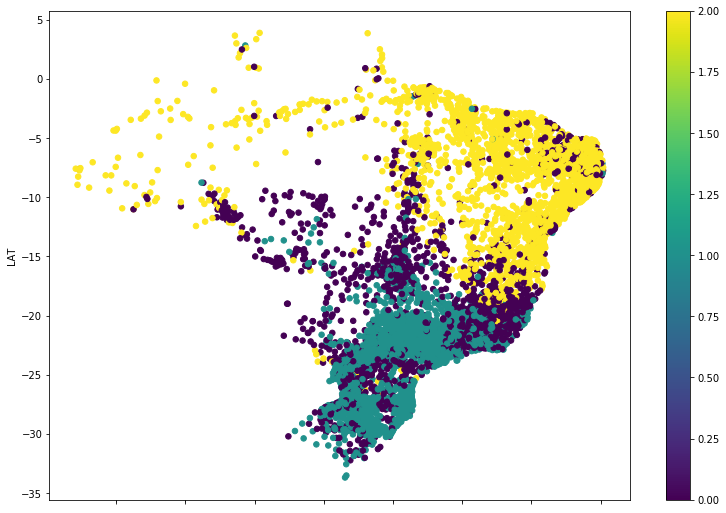

In [19]:
# Visualizando os grupos no mapa
cidades2.plot(kind='scatter', x='LONG', y='LAT', c=grupos, colormap='viridis', s=30, figsize=(13,9))